# Clustering 

## What is a k-means cluster model?

K-Means Cluster models work in the following way – all credit to this blog:

1. Start with a randomly selected set of k centroids (the supposed centers of the k clusters)
2. Determine which observation is in which cluster, based on which centroid it is closest to (using the squared Euclidean distance: ∑pj=1(xij−xi′j)2 where p is the number of dimensions.
3. Recalculate the centroids of each cluster by minimizing the squared Euclidean distance to each observation in the cluster
4. Repeat 2. and 3. until the members of the clusters (and hence the positions of the centroids) no longer change.

## Step One: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline

In [2]:
df = pd.read_csv("faithful.csv")
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [4]:
df.columns

Index(['eruptions', 'waiting'], dtype='object')

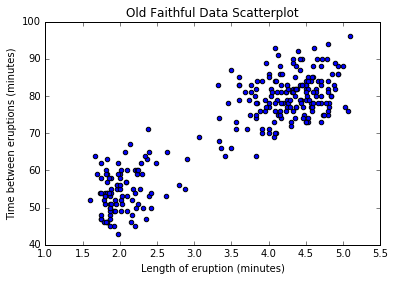

In [5]:
plt.scatter(df.eruptions, df.waiting)
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')

## Step two: Building the cluster model

In [9]:
faith = np.array(df)
faith[1:10]

array([[  1.8  ,  54.   ],
       [  3.333,  74.   ],
       [  2.283,  62.   ],
       [  4.533,  85.   ],
       [  2.883,  55.   ],
       [  4.7  ,  88.   ],
       [  3.6  ,  85.   ],
       [  1.95 ,  51.   ],
       [  4.35 ,  85.   ]])

In [14]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(faith)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [17]:
labels

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

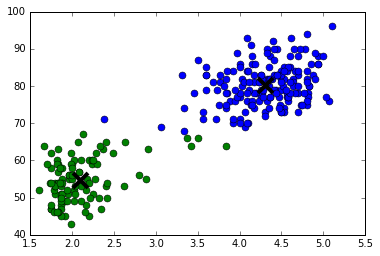

In [23]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = faith[labels==i]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)